<a href="https://colab.research.google.com/github/meanu/2022-fall-data-analysis-programming/blob/main/lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


# Describe Statistics
Describe statistics of data using `describe()` method for numeric data (default mode.)



In [3]:
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


For categorical data, specify `include` parametor as `'object'`. 
(hint, refer [`pd.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html))

In [4]:
df.describe(include= object)

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,89,92,90,87,86,88,88,88,90
unique,31,92,6,3,3,6,2,2,90
top,Ford,Integra,Midsize,Driver only,Front,4,Yes,USA,Acura Integra
freq,8,1,22,39,61,45,57,46,1


## Measuring skewness and kurtosis


First, make a numericColumns by selecting only columns containing numerical data

In [5]:
numericColumns = df.describe().columns
numericColumns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

Measure skewness for all numeric attribute and sort by value.

In [6]:
skewness = df[numericColumns].skew().sort_values(ascending = False)
skewness

Max.Price             2.248420
MPG.city              1.662674
Price                 1.510432
MPG.highway           1.238671
Min.Price             1.227271
Horsepower            0.944585
EngineSize            0.881670
Rev.per.mile          0.354385
Width                 0.288760
Luggage.room          0.149069
Wheelbase             0.108599
Fuel.tank.capacity    0.085445
Passengers            0.081776
Rear.seat.room        0.054352
Length               -0.036669
Turn.circle          -0.127313
RPM                  -0.237511
Weight               -0.269695
dtype: float64

Measure kurtosis for all numeric attribute and sort by value.

In [7]:
kurtosis = df[numericColumns].kurtosis().sort_values(ascending = False)
kurtosis

Max.Price             9.238289
MPG.city              3.617956
Price                 3.328289
MPG.highway           2.596793
Min.Price             1.107837
Horsepower            1.054818
Passengers            0.916041
Rear.seat.room        0.831153
Length                0.406525
EngineSize            0.377147
Rev.per.mile          0.331590
Luggage.room          0.322472
Fuel.tank.capacity    0.017060
Width                -0.201852
RPM                  -0.482837
Wheelbase            -0.821720
Weight               -0.828994
Turn.circle          -0.832044
dtype: float64

## Graphic visualization of skewness and kurtosis

Store the Attributes that skewness value is the largest, smallest and the closet to zero

(hint, df['???'])

In [8]:
highSkewAttribute = df[skewness.index[0]]
lowSkewAttribute =  df[skewness.index[-1]]
zeroSkewAttribute =  df['Length']
# 코드를 통해서 0과 가장 근접한 columns를 찾을 수 있으나 수업과 관련없는 내용이어서 간단하게 처리했습니다.

In [11]:
highSkewAttribute

'Max.Price'

Draw plots. See how the distribution depends on the Skewness

You don't need to enter the code :-)

AttributeError: ignored

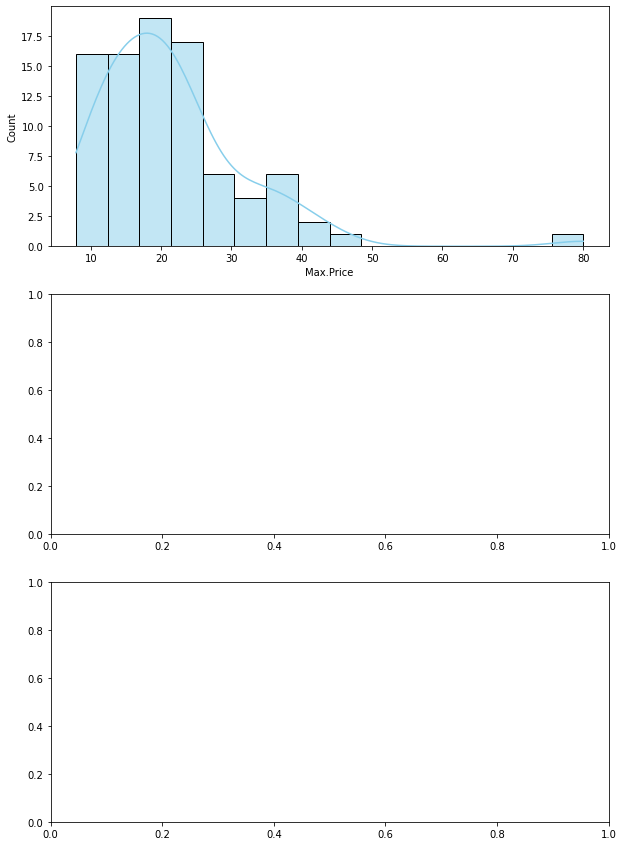

In [9]:
f, axes = plt.subplots(3, 1, figsize=(10, 15))

# set the string 
strInPlot = "Skewness: %f"

# Plot distplot (highSkew)
ax = axes[0]
sns.histplot(data=df, x=highSkewAttribute, color="skyblue", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % highSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

# Plot distplot (zeroSkew)
ax = axes[1]
sns.histplot(data=df, x=zeroSkewAttribute, color="khaki", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % zeroSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

# Plot distplot (lowSkew)
ax = axes[2]
sns.histplot(data=df, x=lowSkewAttribute, color="salmon", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % lowSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

Store the Attributes that kurtosis value is the largest and smallest

(hint, df['???'])

In [ ]:
highKurtAttribute = df[kurtosis.index[0]]
lowKurtAttribute = df[kurtosis.index[-1]]

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(10, 10))

# set the string 
strInPlot = "Kurtosis: %f"

# Plot distplot (highKurtosis)
ax = axes[0]
sns.histplot(data=df, x=highKurtAttribute, color="skyblue", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % highKurtAttribute.kurtosis(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

# Plot distplot (lowKurtosis)
ax = axes[1]
sns.histplot(data=df, x=lowKurtAttribute, color="salmon", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s=strInPlot % lowKurtAttribute.kurtosis(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

# Correlation
**[TODO]** Select `Price`, `Horsepower`, `Passengers`, `Length`, `Weight` attribte from dataframe, and compute `pearson` correlation value.

In [12]:
## Compelete the code
selectedDataFrame = df[['Price', 'Horsepower', 'Passengers', 'Length', 'Weight']]
selectedDataFrame.corr(method ='pearson')

,Price,Horsepower,Passengers,Length,Weight
Price,1.000000,0.794607,0.040890,0.564704,0.642563
Horsepower,0.794607,1.000000,-0.039870,0.552906,0.777764
Passengers,0.040890,-0.039870,1.000000,0.473748,0.577401
Length,0.564704,0.552906,0.473748,1.000000,0.813305
Weight,0.642563,0.777764,0.577401,0.813305,1.000000


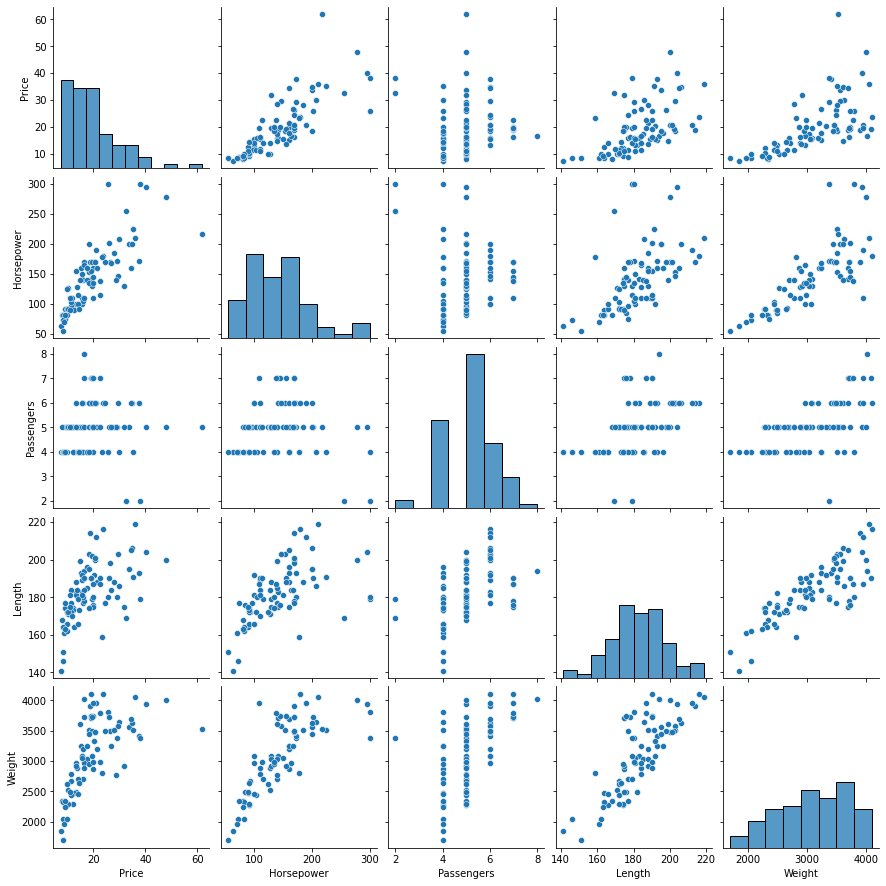

In [13]:
g = sns.pairplot(selectedDataFrame)
plt.show()

# Statistical Hypothesis Test
We would like the test that is there a significant `weight` difference between `small` and `midsize` type car.

Test our hypothesis with proper statistical test with siginificance level as 0.05.

If there is missing value (`nan`) in `pd.Series`, test will not be working properly. 

In [ ]:
siginificantLevel = 0.05
smallCar = df[df['Type'] == 'Small']['Passengers'].dropna()
midsizeCar = df[df['Type'] == 'Midsize']['Passengers'].dropna()

stats, p = ttest_ind(smallCar,midsizeCar)
print('P-value', format(p, ".19f"))

if p < siginificantLevel:
  print("The Weight of the two types shows a significant difference.")
else:
  print("The Weight of the two types shows no significant difference.")

Then, let's test that is there is a significant `Length` difference between `top 50% weight` and `bottom 50% weight`.

In [ ]:
significiantLevel = 0.05

standard = df['Weight'].quantile(.5)

lightCar = df[df['Weight'] < standard]['Length'].dropna()
heavyCar = df[df['Weight'] > standard]["Length"].dropna()

stats, p = ttest_ind(lightCar, heavyCar)
print('P-value', format(p, ".19f"))

if p < siginificantLevel:
  print("The Length and Weight shows a significant difference.")
else:
  print("The Length and Weight shows no significant difference.")

# Todo!

**[Tip]** 

1.   과제 중 진행이 어려우시다면 구글링을 시도해보세요. 데이터 분석 프로그래밍은 구글링 하는 능력을 향상시키는 데 목적을 두기도 합니다.

2.   그래도 너무 어렵다면 이루리에 질문을 남겨주세요, 저희가 친절하게 답변해드립니다. (조금 늦을수는 있지만…)

3.   할 수 있습니다 화이팅!

---

## 1. 라면 데이터 준비하기



이번 실습에서는 한국에서 판매하는 라면에 대해 간단히 분석해볼 것입니다.

우선 데이터를 제가 준비해두었습니다!

아래의 표를 한번 확인해보세요.



In [17]:
df = pd.read_excel('https://github.com/TA-YSH/DAP/raw/main/lab3/FoodListExcel.xlsx')
df

,sample_id,name_product,name_manufacturer,survey_year,class,class_recipe,code,source_data,serving_size,kcal,kj,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,saturated_fat_per,trans_fat
0,P064392ZZAVG,NEW 공화춘곱빼기,팔도,2021,가공식품,유탕면,P064392,식약처('21),230,745.00,NaN,14.00,36.00,91.00,7.00,1230.00,10.0,15.00,NaN,0.0
1,P064393ZZAVG,NEW 공화춘자장컵,팔도,2021,가공식품,유탕면,P064393,식약처('21),200,620.00,NaN,11.00,31.00,74.00,7.00,1130.00,10.0,12.00,NaN,0.0
2,P064394ZZAVG,강릉 교동반점 직화짬뽕소컵,팔도,2021,가공식품,유탕면,P064394,식약처('21),65,290.00,NaN,6.00,12.00,39.00,3.00,1040.00,5.0,6.00,NaN,0.0
3,P064395ZZAVG,꼬꼬누룽지탕면,팔도,2021,가공식품,유탕면,P064395,식약처('21),120,505.00,NaN,9.00,13.00,88.00,4.00,1670.00,2.0,6.00,NaN,0.0
4,P064396ZZAVG,뉴트리 클로렐라컵면,팔도,2021,가공식품,유탕면,P064396,식약처('21),65,300.00,NaN,6.00,12.00,41.00,1.00,940.00,8.0,6.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,P014688ZZAVG,컵누들 우동맛,오뚜기,2017,가공식품,유탕면,P014688,식약처 산업체제공('17),38,119.69,NaN,1.99,0.50,26.93,2.99,887.66,0.0,0.00,NaN,0.0
617,P014702ZZAVG,튀김우동 컵,농심,2017,가공식품,유탕면,P014702,식약처 산업체제공('17),80,325.16,NaN,4.13,15.48,42.32,2.88,1238.70,0.0,5.16,NaN,0.0
618,P014714ZZAVG,하모니,농심,2017,가공식품,유탕면,P014714,식약처 산업체제공('17),120,498.25,NaN,7.74,19.35,73.53,1.31,870.73,0.0,8.71,NaN,0.0
619,P014726ZZAVG,후루룩 국수,농심,2017,가공식품,유탕면,P014726,식약처 산업체제공('17),120,544.42,NaN,15.31,1.19,117.39,3.01,2909.20,0.0,0.00,NaN,0.0


## 2. 필요없는 열 드랍하기



분석에 필요 없는 속성값은 모두 제거하는 것이 좋을 것입니다.

그 때 제일 유용한 도구는 바로 ‘drop’이라는 함수입니다.

`df.drop()`을 이용하면 원하는 columns를 제거할 수 있습니다.

제가 필요 없는 속성으로 보이는 것들을 dropColumns라는 리스트 안에 넣어두었습니다.

df에서 해당 속성들을 모두 제거해주세요.

만약 진행이 어렵다면 아래의 레퍼런스를 참조해주세요. 

pandas.DataFrame.drop: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [18]:
dropColumns = ['sample_id', 'survey_year', 'code', 'source_data']
df.drop(columns = dropColumns, inplace=True)
df

,name_product,name_manufacturer,class,class_recipe,serving_size,kcal,kj,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,saturated_fat_per,trans_fat
0,NEW 공화춘곱빼기,팔도,가공식품,유탕면,230,745.00,NaN,14.00,36.00,91.00,7.00,1230.00,10.0,15.00,NaN,0.0
1,NEW 공화춘자장컵,팔도,가공식품,유탕면,200,620.00,NaN,11.00,31.00,74.00,7.00,1130.00,10.0,12.00,NaN,0.0
2,강릉 교동반점 직화짬뽕소컵,팔도,가공식품,유탕면,65,290.00,NaN,6.00,12.00,39.00,3.00,1040.00,5.0,6.00,NaN,0.0
3,꼬꼬누룽지탕면,팔도,가공식품,유탕면,120,505.00,NaN,9.00,13.00,88.00,4.00,1670.00,2.0,6.00,NaN,0.0
4,뉴트리 클로렐라컵면,팔도,가공식품,유탕면,65,300.00,NaN,6.00,12.00,41.00,1.00,940.00,8.0,6.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,컵누들 우동맛,오뚜기,가공식품,유탕면,38,119.69,NaN,1.99,0.50,26.93,2.99,887.66,0.0,0.00,NaN,0.0
617,튀김우동 컵,농심,가공식품,유탕면,80,325.16,NaN,4.13,15.48,42.32,2.88,1238.70,0.0,5.16,NaN,0.0
618,하모니,농심,가공식품,유탕면,120,498.25,NaN,7.74,19.35,73.53,1.31,870.73,0.0,8.71,NaN,0.0
619,후루룩 국수,농심,가공식품,유탕면,120,544.42,NaN,15.31,1.19,117.39,3.01,2909.20,0.0,0.00,NaN,0.0


### 2-2. NaN 값이 많은 속성 제거하기

이제 NaN 값이 너무 많아서 오히려 방해가 될 것 같은 속성을 지워봅시다.

사실 이런 NaN 값을 적당한 값으로 채워넣어주는 방법 또한 분명히 존재합니다.

하지만 해당 내용은 추후에 배우게 될 것이므로 이번 실습에서는 제거하는 방향으로 처리합시다.


우선, NaN 데이터가 각 속성마다 몇 개 있는지 pd.Series 형식으로 출력해주세요.

저번 실습에서 한 번 해보셨기 때문에 쉽게 하실 수 있을 것입니다!

In [19]:
nullSeries = df.isnull().sum()
nullSeries

name_product           0
name_manufacturer      0
class                  0
class_recipe           0
serving_size           0
kcal                   0
kj                   621
protein                0
fat                    0
carbohydrate           0
sugars                 0
sodium                 0
cholesterol           10
saturated_fat          2
saturated_fat_per    621
trans_fat              1
dtype: int64

다음 조건에 따라 코드를 작성하세요

**[조건]**
1. `’nullList’`란 전체 데이터의 절반 이상이 NaN인 속성의 이름을 저장한 리스트입니다.
2. `’nullList’`의 원소를 코드로 직접 선언하지 마세요.(ex: null_list = [‘kj’, ‘saturated_fat_per’])
3. 방금 만들었던 `’nullSeries’`를 반드시 사용하세요.

**[힌트]**
1. 이 코드는 한줄로 작성이 가능합니다. 하지만 여러 줄로 작성하셔도 무방합니다.
2. `’nullSeries’`는 list처럼 각 원소에 접근 가능합니다. (ex: null_series[0])


In [20]:
nullList = []
for i in df.columns :
  if df[i].isnull().sum() > len(df)/2:
    nullList.append(i)
nullList

['kj', 'saturated_fat_per']

`drop()` 함수를 이용해서 `nullList`에 저장된 속성들을 df에서 제거해주세요.

In [21]:
df.drop(columns = nullList, inplace =True)
df

,name_product,name_manufacturer,class,class_recipe,serving_size,kcal,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,trans_fat
0,NEW 공화춘곱빼기,팔도,가공식품,유탕면,230,745.00,14.00,36.00,91.00,7.00,1230.00,10.0,15.00,0.0
1,NEW 공화춘자장컵,팔도,가공식품,유탕면,200,620.00,11.00,31.00,74.00,7.00,1130.00,10.0,12.00,0.0
2,강릉 교동반점 직화짬뽕소컵,팔도,가공식품,유탕면,65,290.00,6.00,12.00,39.00,3.00,1040.00,5.0,6.00,0.0
3,꼬꼬누룽지탕면,팔도,가공식품,유탕면,120,505.00,9.00,13.00,88.00,4.00,1670.00,2.0,6.00,0.0
4,뉴트리 클로렐라컵면,팔도,가공식품,유탕면,65,300.00,6.00,12.00,41.00,1.00,940.00,8.0,6.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,컵누들 우동맛,오뚜기,가공식품,유탕면,38,119.69,1.99,0.50,26.93,2.99,887.66,0.0,0.00,0.0
617,튀김우동 컵,농심,가공식품,유탕면,80,325.16,4.13,15.48,42.32,2.88,1238.70,0.0,5.16,0.0
618,하모니,농심,가공식품,유탕면,120,498.25,7.74,19.35,73.53,1.31,870.73,0.0,8.71,0.0
619,후루룩 국수,농심,가공식품,유탕면,120,544.42,15.31,1.19,117.39,3.01,2909.20,0.0,0.00,0.0


## 3. 최솟값, 최댓값 그리고 사분위수

아래의 df의 대략적인 내용을 `describe()` 함수를 이용해서 출력해주세요. 그리고 출력값의 `min`, `25%`, `50%`, `75%`, `max` columns와 df2의 kcal 속성을 주목하세요.

In [22]:
df.describe()

,serving_size,kcal,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,trans_fat
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,611.000000,619.000000,620.000000
mean,108.958132,439.725894,8.729662,15.035781,67.157407,5.523800,1370.753559,3.323273,7.054443,0.014677
std,31.667601,106.782258,2.520399,5.692365,16.776216,3.629177,420.397811,6.393039,2.824633,0.322291
min,20.000000,13.630000,0.000000,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,380.000000,7.000000,12.000000,57.000000,3.000000,1080.000000,0.000000,6.000000,0.000000
50%,110.000000,470.000000,9.000000,16.000000,70.000000,4.610000,1450.000000,0.000000,8.000000,0.000000
75%,120.000000,500.000000,10.000000,18.000000,77.000000,7.000000,1690.000000,5.000000,9.000000,0.000000
max,253.000000,745.000000,20.000000,36.000000,117.390000,24.000000,3035.500000,67.000000,15.000000,8.000000


다음 조건에 따라 df2를 완성하세요.

**[조건]**
1. `df2`는 `df`에 속한 라면들 중, ‘kcal’이 최솟값, 일사분위수, 이사분위수, 삼사분위수, 최댓값과 일치하는 라면을 저장한 데이터프레임입니다. 
2. df2는 `kcal` 값을 기준, 오름차순으로 정렬되어야 합니다.
3. `df.describe()`를 선언하거나 사용하지 마세요.
4. 최솟값, 최댓값, 사분위수들을 직접 선언하지 마세요. (ex: list = [13.63, 380, 470, 500, 745])


In [1]:
df2 = pd.DataFrame(columns = df.columns)

q0= df['kcal'].quantile(0)
q1= df['kcal'].quantile(.25)
q2= df['kcal'].quantile(.5)
q3= df['kcal'].quantile(.75)
q4= df['kcal'].quantile(1)
qlist = [q0,q1,q2,q3,q4]

df2=df2.append(df[df['kcal'] == q1])

df2



NameError: ignored

In [70]:
df2

,name_product,name_manufacturer,class,class_recipe,serving_size,kcal,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,trans_fat


## 4. 관계성 분석하기


**`kcal`**, **`protein`**, **`fat`**, **`carbohydrate`** 의 관계성을 파악해보세요.

method는 pearson을 사용해주세요.

In [28]:
dfNutri = df[['kcal', 'protein', 'fat', 'carbohydrate']]
dfNutri.corr(method='pearson', min_periods=1)
##############

,kcal,protein,fat,carbohydrate
kcal,1.000000,0.816188,0.777269,0.870106
protein,0.816188,1.000000,0.513249,0.757226
fat,0.777269,0.513249,1.000000,0.396166
carbohydrate,0.870106,0.757226,0.396166,1.000000


아래의 그래프 출력 코드는 따로 입력하지 않으셔도 괜찮습니다.

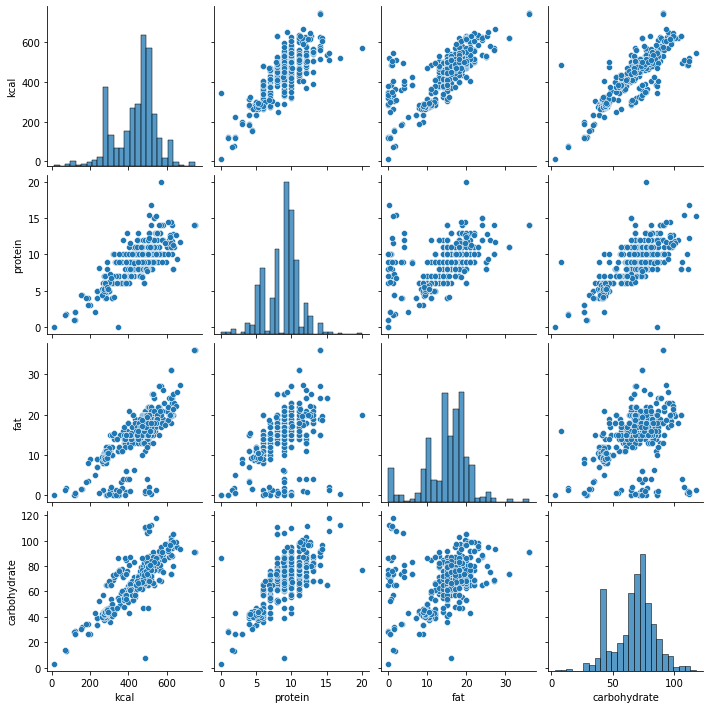

In [29]:
g = sns.pairplot(dfNutri)
plt.show()

## 5. T-TEST

가설을 세우고 검증해봅시다!

이번 실습에서 세울 가설은 바로, **`‘내가 좋아하는 라면의 소듐 함량은 해당 제조사의 라면들 중 적은 편일 것이다.’`** 입니다.

좋아하는 라면을 `'yourFavoriteRamen'` 변수에 입력하고 코드를 실행해주세요.

---

**[결과가 나오지 않는다면?]**

만약 결과가 나오지 않는다면 단어를 좀 더 짧게 검색해주세요. (ex: 블랙신라면 -> 신라면)

그래도 나오지 않는다면 해당 라면이 데이터베이스에 존재하지 않는다는 뜻입니다…

다른 라면으로 검색을 시도해주세요.

---

**[결과가 여러개 나온다면?]**

만약 같은 이름의 라면이 중복해서 나온다면 하나의 인덱스를 골라주세요.

어떤 라면을 선택하셔도 괜찮습니다.

예를 들어 첫 번째 오뚜기 진라면 순한맛의 `인덱스`는 115번입니다.

---

**[좋아하는 라면이 없다면?]**

헐

In [34]:
yourFavoriteRamen = '튀김우동 컵'
df[df['name_product'].str.contains(yourFavoriteRamen)]

,name_product,name_manufacturer,class,class_recipe,serving_size,kcal,protein,fat,carbohydrate,sugars,sodium,cholesterol,saturated_fat,trans_fat
617,튀김우동 컵,농심,가공식품,유탕면,80,325.16,4.13,15.48,42.32,2.88,1238.7,0.0,5.16,0.0


적절한 가설 검증법을 사용해서 당신이 좋아하는 라면이 해당 제조사의 라면들보다 소듐 함량이 **적은지** 확인해보세요.

**[힌트]**
1. `yourFavoriteRamen` 에는 당신이 좋아하는 라면의 행 정보가 들어가야합니다. 바로 위 결과에서 확인한 인덱스를 이용해서 정보를 넣어주세요.
2. 어떤 가설 검증법이 제일 적절할지 수업자료를 참조해서 파악해보세요. (심지어 구현 방법까지 다 나와 있습니다.)
3. **어떤 가설 검증법을 사용해야할지 알 것 같다면, 해당 검증법의 api 문서에서 추가로 필요한 arguments가 없는지 파악하세요.**
4. 결과값은 당연히 다르게 나올 것입니다. (진라면 순한맛을 좋아하는 사람은 없을테니까요…) 해당 코드는 결과가 아닌 코드의 내용으로 채점합니다.


In [47]:
siginificantLevel = 0.05

yourFavoriteRamen = df.loc[617]
yourRamenSodium = float(yourFavoriteRamen['sodium'])

sameManuSodium = df[df['name_manufacturer']==yourFavoriteRamen['name_manufacturer']]['sodium'].dropna().astype(np.float64)
#######enter your code######
_,p = ttest_1samp(sameManuSodium,yourRamenSodium)


############################


if p < siginificantLevel:
  print("Your hypothesis is accepted")
else:
  print("Your hypothesis is rejected")

Your hypothesis is accepted
